In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import numpy.random as rnd
import random

# Task 1

idea of the model:

Start with regular lattice with N nodes, K nearest neighbours
For each node take every edge and rewire it with probability $p$, assuming that there is no loops and edge duplications

Implement rewind(G, p) function that takes graph G and probability p as input. The function should produce a graph after step 2 of the model above.

In [55]:
def gen_regular_graph(n, k):
    G = nx.Graph()
    nodes = list(range(n))
    for j in range(1, k // 2+1):
        targets = nodes[j:] + nodes[0:j] # first j nodes are now last in list
        G.add_edges_from(zip(nodes,targets))
    return G

In [147]:
def rewind(G, p):
    G2 = G.copy()
    for v in G2:
        for e in list(G2.edges(v)):
            if rnd.random() < p:
                new_edge = (v, random.choice([w for w in list(G2.nodes) if w is not v and (v,w) not in G2.edges]))
                G2.add_edge(new_edge[0], new_edge[1])
                G2.remove_edge(e[0], e[1])
    return G2

# Task 2

Run experiments for various values of p, compute and show

average path length

clustering coefficients (transitivity)

degree distribution

In [68]:
def find_attributes(G):
    G_comp = G.subgraph(max(nx.connected_component_subgraphs(G), key=len))
    return nx.average_shortest_path_length(G_comp), nx.transitivity(G_comp), sorted(list(dict(nx.degree(G_comp)).values()),reverse=True)

In [95]:
def plot_degrees(degrees):
    yh0, binEdges=np.histogram(degrees, bins=max(degrees))
    plt.plot(np.arange(1, max(degrees)+1), yh0, '-', lw=2)
    plt.ylabel('count')
    plt.xlabel('x')
    return

In [148]:
n = 200
k = 5

-----------------
25.376884422110553 0.5
-----------------
-----------------
5.018090452261307 0.25255704169944926
-----------------
-----------------
4.403819095477387 0.10658771280532939
-----------------
-----------------
4.078320897416375 0.05450733752620545
-----------------
-----------------
4.063969849246231 0.0314026517794836
-----------------
-----------------
3.9588853357697578 0.02754098360655738
-----------------
-----------------
3.945789553829755 0.013539651837524178
-----------------
-----------------
4.034465255570783 0.01977587343441002
-----------------
-----------------
3.9932490736510835 0.015345268542199489
-----------------
-----------------
3.9821817051693773 0.02142857142857143
-----------------


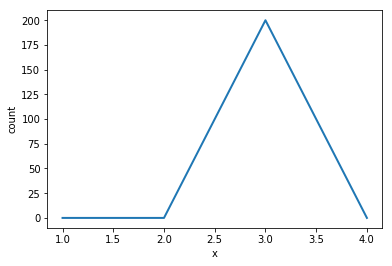

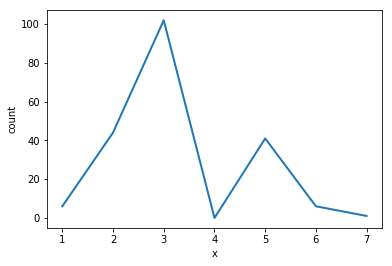

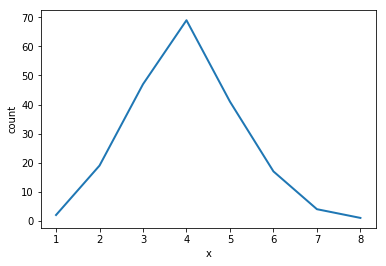

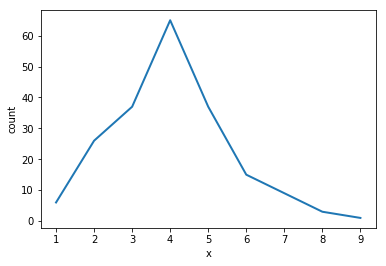

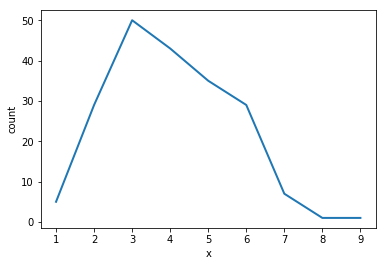

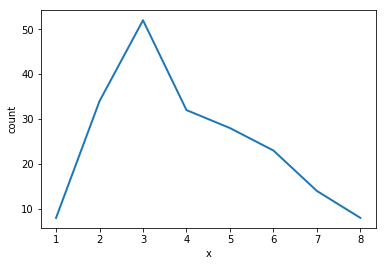

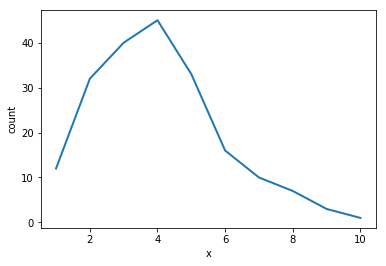

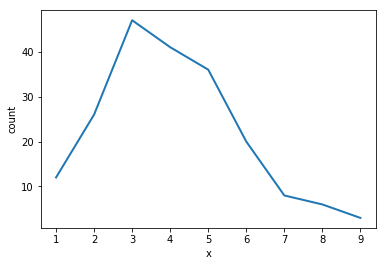

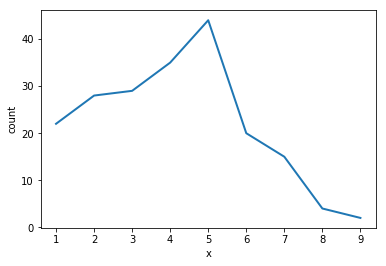

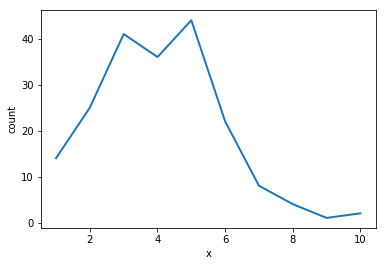

In [149]:
G = gen_regular_graph(n, k)
for p in np.linspace(0, 1, 10):
    G2 = rewind(G, p)
    attr = find_attributes(G2)
    print("-----------------")
    print(attr[0], attr[1])
    plot_degrees(attr[2])
    plt.figure()
    print("-----------------")

With increase of p shortest path length decreases, so as transitivity coefficient. Degree distribution is poisson-like.

# Task 3

In [150]:
G2 = nx.read_gml("polblogs.gml")

In [155]:
G3 = nx.Graph()
for edge in G2.edges:
    u = edge[0]
    v = edge[1]
    if (u,v) not in G3.edges and u != v:
        G3.add_edge(u,v)
print(len(list(G3.edges)), len(list(G2.edges)))

16715 19078


In [164]:
deg = nx.degree_centrality(G3)

In [165]:
clos = nx.closeness_centrality(G3)

In [167]:
betw = nx.betweenness_centrality(G3)

In [158]:
eig = nx.eigenvector_centrality(G3)

In [160]:
disp = nx.dispersion(G3)